# Import Packages and Library

In [250]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Import Data

In [199]:
df_store = pd.read_csv("D:/hypermarket_analysis/raw_data/stores.csv")

In [200]:
df_train = pd.read_csv("D:/hypermarket_analysis/raw_data/train.csv")

In [201]:
df_feature =pd.read_csv("D:/hypermarket_analysis/raw_data/features.csv")

# Working on Data

### First Look to Data and Reviwing the first 5 line by *head()*

In [6]:
df_store.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [8]:
df_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [7]:
df_feature.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


### Merge Three Tables

In [198]:
df_merge = df_train.merge(df_feature, how='inner', on=['Store', 'Date']).merge(df_store, how='inner', on=['Store'])

In [61]:
df_merge.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315


In [15]:
df_merge.shape

(421570, 17)

### How many **Stores** and **Department** exist?

In [17]:
df_merge['Store'].nunique()

45

In [19]:
df_merge['Store'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

In [18]:
df_merge['Dept'].nunique()

81

In [26]:
df_merge['Dept'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 40, 41, 42, 44, 45, 46, 47, 48, 49, 51, 52, 54, 55, 56,
       58, 59, 60, 67, 71, 72, 74, 79, 80, 81, 82, 83, 85, 87, 90, 91, 92,
       93, 94, 95, 97, 98, 78, 96, 99, 77, 39, 50, 43, 65], dtype=int64)

### Reviewing weekly sales of stores and departments

In [29]:
df_dep_store = pd.pivot_table(df_merge, index='Store', columns='Dept', values='Weekly_Sales')
display(df_dep_store)

Dept,1,2,3,4,5,6,7,8,9,10,...,90,91,92,93,94,95,96,97,98,99
Store,,,,,,,,,,,,,,,,,,,,,
1,22513.322937,46102.090420,13150.478042,36964.154476,24257.941119,4801.780140,24566.487413,35718.257622,28062.052238,31033.386364,...,82427.547832,64238.943427,135458.969510,71699.182378,63180.568182,120772.062168,33251.831639,35207.348811,11827.770769,306.091081
2,30777.980769,65912.922517,17476.563357,45607.666573,30555.315315,6808.382517,40477.837063,58707.369441,34375.864476,38845.854476,...,97611.537133,80610.380350,164840.230979,70581.977063,70018.672517,143588.751888,34319.063846,40697.204056,14035.400839,475.896905
3,7328.621049,16841.775664,5509.300769,8434.186503,11695.366573,2012.411818,10044.341608,8310.254196,9062.007692,10871.944126,...,1540.049161,318.685594,7568.280210,NaN,656.294444,15745.528252,3934.540000,343.437357,30.570833,NaN
4,36979.940070,93639.315385,19012.491678,56603.400140,45668.406783,8241.777692,50728.151399,62949.723776,34437.170979,37269.667413,...,89248.965524,66535.407203,159365.107902,67815.163007,68159.106573,147236.473706,38346.573077,39339.238951,15009.249371,623.182381
5,9774.553077,12317.953287,4101.085175,9860.806783,6699.202238,1191.057622,6124.484336,13735.709441,7919.805944,9783.395385,...,3059.520000,1457.221678,7759.205594,NaN,411.431486,19340.693986,5985.671119,667.070315,29.976087,NaN
6,23867.553776,50269.437273,16806.638811,34187.366503,34465.307622,7225.566643,34526.870420,47577.719790,48271.060140,47436.477902,...,53715.366084,45270.405175,99024.796503,41359.651189,41701.693497,89208.786294,30450.542238,20637.667063,9728.100629,388.636750
7,9542.801259,22603.690769,8633.536923,14950.518601,13860.350490,6329.928811,10925.757063,13970.619371,29722.736084,21136.560280,...,13858.405874,10263.880000,26530.890559,1328.178252,699.332522,34208.097273,1123.383217,4374.927902,260.886596,15.000000
8,14789.827343,35729.821748,10683.305105,21089.309301,19838.849231,3395.425455,20268.743776,26438.524336,11792.661678,20666.433776,...,39333.566154,31530.560909,60465.630000,27515.635315,25442.578042,62951.463706,16.986667,16978.366503,6880.466434,298.153714
9,11846.558252,24969.477413,7497.356783,17165.947762,19282.746014,2806.416364,13826.694336,21424.470699,13196.569720,12810.480350,...,2981.249510,869.273287,14123.063147,21.240000,599.112568,29575.050769,3596.107762,372.655556,27.930000,NaN


### Delete some wrong values

In [32]:
display(df_merge[df_merge['Weekly_Sales'] <= 0])

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
188,1,47,2010-02-19,-863.00,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
406,1,47,2010-03-12,-698.00,False,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,False,A,151315
2549,1,47,2010-10-08,-58.00,False,63.93,2.633,NaN,NaN,NaN,NaN,NaN,211.746754,7.838,False,A,151315
3632,1,54,2011-01-21,-50.00,False,44.04,3.016,NaN,NaN,NaN,NaN,NaN,211.827234,7.742,False,A,151315
4132,1,47,2011-03-11,0.00,False,53.56,3.459,NaN,NaN,NaN,NaN,NaN,214.111056,7.742,False,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420066,45,49,2012-05-25,-4.97,False,67.21,3.798,5370.39,NaN,361.22,1287.62,2461.81,191.002810,8.567,False,B,118221
420403,45,49,2012-06-29,-34.00,False,75.22,3.506,3291.36,425.60,NaN,314.88,2255.34,191.099246,8.567,False,B,118221
420736,45,49,2012-08-03,-1.91,False,76.58,3.654,24853.05,39.56,17.96,11142.69,2768.32,191.164090,8.684,False,B,118221
421007,45,54,2012-08-31,0.00,False,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,191.461281,8.684,False,B,118221


In [34]:
df_merge = df_merge[df_merge['Weekly_Sales']>0]
df_merge.shape

(420212, 17)

### I want to know the period of data

In [37]:
df_merge['Date'].head()

0    2010-02-05
1    2010-02-05
2    2010-02-05
3    2010-02-05
4    2010-02-05
Name: Date, dtype: object

In [36]:
df_merge['Date'].tail()

421565    2012-10-26
421566    2012-10-26
421567    2012-10-26
421568    2012-10-26
421569    2012-10-26
Name: Date, dtype: object

In [47]:
pd.concat([df_merge['Date'].head(5), df_merge['Date'].tail(5)])

0         2010-02-05
1         2010-02-05
2         2010-02-05
3         2010-02-05
4         2010-02-05
421565    2012-10-26
421566    2012-10-26
421567    2012-10-26
421568    2012-10-26
421569    2012-10-26
Name: Date, dtype: object

### Reviewing the effect of holiday on weekly sale

<Axes: xlabel='IsHoliday_x', ylabel='Weekly_Sales'>

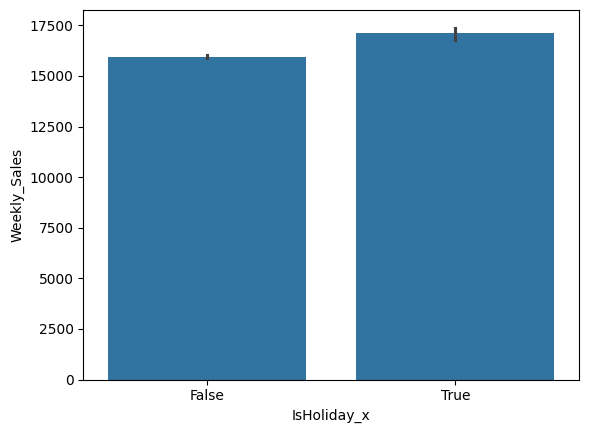

In [51]:
sns.barplot(data=df_merge, x='IsHoliday_x', y='Weekly_Sales')

### We want to know which Holiday has more effect on sales

In [235]:
df_holiday = df_merge[df_merge['IsHoliday_x'] == True]
df_holiday['Date'].unique()

array(['2010-02-12', '2010-09-10', '2010-11-26', '2010-12-31',
       '2011-02-11', '2011-09-09', '2011-11-25', '2011-12-30',
       '2012-02-10', '2012-09-07'], dtype=object)

In [236]:
# Create new column that name is Super_Bowl and fill this by True or False
df_merge.loc[(df_merge['Date'] == '2010-02-12') | (df_merge['Date'] == '2011-02-11') | (df_merge['Date'] == '2012-02-10'),'Super_Bowl'] = True
df_merge.loc[(df_merge['Date'] != '2010-02-12') & (df_merge['Date'] != '2011-02-11') & (df_merge['Date'] != '2012-02-10'),'Super_Bowl'] = False

C:\Users\rahim\AppData\Local\Temp\ipykernel_18840\1154660734.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'True' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_merge.loc[(df_merge['Date'] == '2010-02-12') | (df_merge['Date'] == '2011-02-11') | (df_merge['Date'] == '2012-02-10'),'Super_Bowl'] = True


In [237]:
# Create new column that name is Labor_Day and fill this by True or False
df_merge.loc[(df_merge['Date'] == '2010-09-10') | (df_merge['Date'] == '2011-09-09') | (df_merge['Date'] == '2012-09-07'), 'Labor_Day'] = True
df_merge.loc[(df_merge['Date'] != '2010-09-10') & (df_merge['Date'] != '2011-09-09') & (df_merge['Date'] != '2012-09-07'), 'Labor_Day'] = False

C:\Users\rahim\AppData\Local\Temp\ipykernel_18840\3296950984.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'True' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_merge.loc[(df_merge['Date'] == '2010-09-10') | (df_merge['Date'] == '2011-09-09') | (df_merge['Date'] == '2012-09-07'), 'Labor_Day'] = True


In [238]:
# Create new column that name is Thanksgiving and fill this by True or False
df_merge.loc[(df_merge['Date'] == '2010-11-26') | (df_merge['Date'] == '2011-11-25'), 'Thanksgiving'] = True
df_merge.loc[(df_merge['Date'] != '2010-11-26') & (df_merge['Date'] != '2011-11-25'), 'Thanksgiving'] = False

C:\Users\rahim\AppData\Local\Temp\ipykernel_18840\4260021452.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'True' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_merge.loc[(df_merge['Date'] == '2010-11-26') | (df_merge['Date'] == '2011-11-25'), 'Thanksgiving'] = True


In [239]:
# Create new column that name is Christmas and fill this by True or False
df_merge.loc[(df_merge['Date'] == '2010-12-31') | (df_merge['Date'] == '2011-12-30'), 'Christmas'] = True
df_merge.loc[(df_merge['Date'] != '2010-12-31') & (df_merge['Date'] != '2011-12-30'), 'Christmas'] = False

C:\Users\rahim\AppData\Local\Temp\ipykernel_18840\1153163674.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'True' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_merge.loc[(df_merge['Date'] == '2010-12-31') | (df_merge['Date'] == '2011-12-30'), 'Christmas'] = True


In [240]:
df_merge.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size,Super_Bowl,Labor_Day,Thanksgiving,Christmas
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,...,NaN,211.096358,8.106,False,A,151315,False,False,False,False
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,...,NaN,211.096358,8.106,False,A,151315,False,False,False,False
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,...,NaN,211.096358,8.106,False,A,151315,False,False,False,False
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,...,NaN,211.096358,8.106,False,A,151315,False,False,False,False
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,...,NaN,211.096358,8.106,False,A,151315,False,False,False,False


In [241]:
count_true_values = len(df_merge.loc[df_merge['IsHoliday_x'] == True])
display(count_true_values)

29661

In [242]:
count_false_values = len(df_merge.loc[df_merge['IsHoliday_x'] == False])
display(count_false_values)

391909

<Axes: xlabel='Super_Bowl', ylabel='Weekly_Sales'>

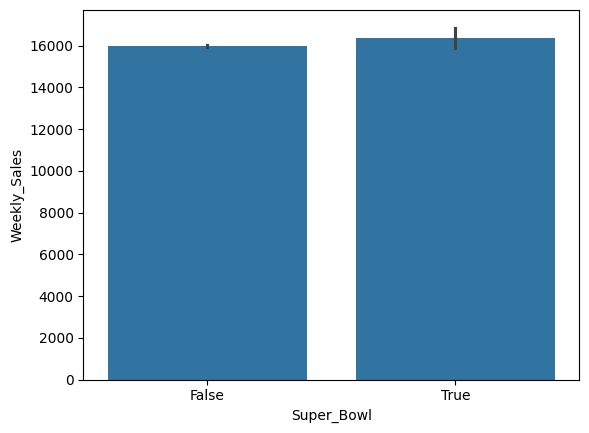

In [243]:
sns.barplot(data=df_merge, x='Super_Bowl', y='Weekly_Sales')

<Axes: xlabel='Labor_Day', ylabel='Weekly_Sales'>

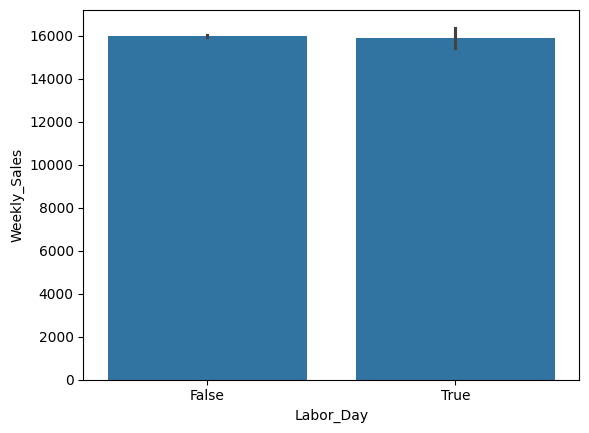

In [244]:
sns.barplot(data=df_merge, x='Labor_Day', y='Weekly_Sales')

<Axes: xlabel='Thanksgiving', ylabel='Weekly_Sales'>

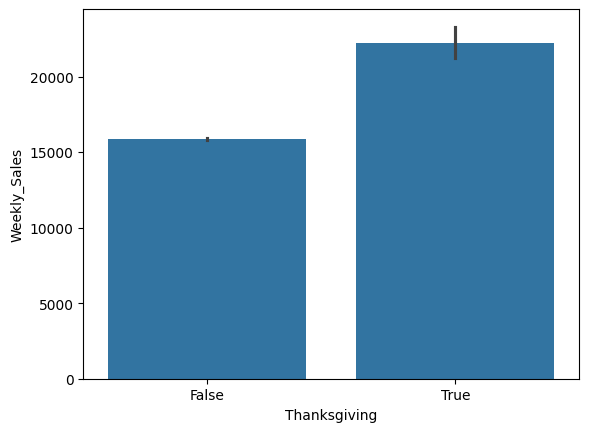

In [245]:
sns.barplot(data=df_merge, x='Thanksgiving', y='Weekly_Sales')

<Axes: xlabel='Christmas', ylabel='Weekly_Sales'>

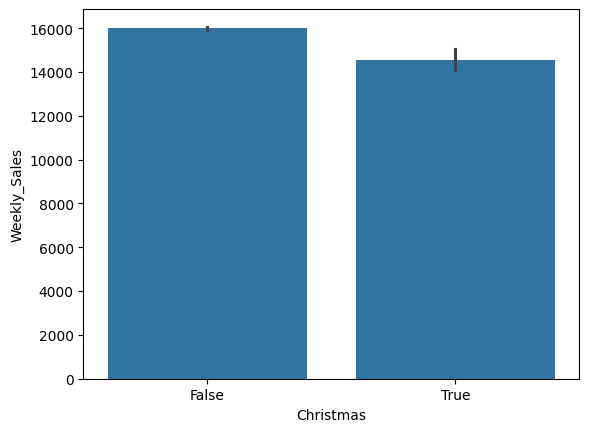

In [246]:
sns.barplot(data=df_merge, x='Christmas', y='Weekly_Sales')

## Examining the effect of **Store Type** and **Holiday** on weekly sales

### Super Bowl

In [247]:
df_merge.groupby(['Type', 'Super_Bowl']) ['Weekly_Sales'].mean()

Type  Super_Bowl
A     False         20088.683671
      True          20603.690832
B     False         12233.518469
      True          12401.718198
C     False          9506.055492
      True          10156.204711
Name: Weekly_Sales, dtype: float64

In [151]:
HT1 = df_merge.groupby(['Type', 'Super_Bowl']) ['Weekly_Sales'].mean()

In [150]:
df_plot_Super_Bowl = HT1.reset_index()

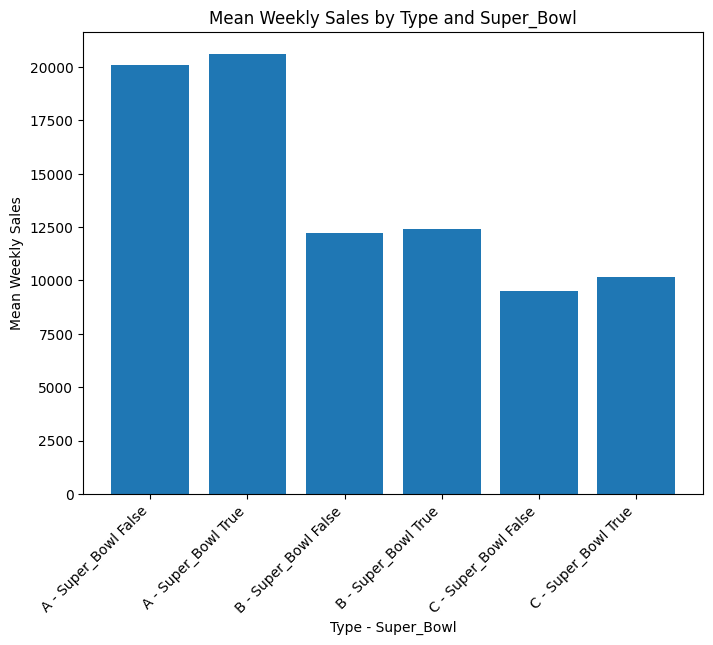

In [153]:
plt.figure(figsize=(8, 6))
plt.bar(range(len(df_plot_Super_Bowl)), df_plot_Super_Bowl['Weekly_Sales'], tick_label=df_plot_Super_Bowl['Type'] + ' - Super_Bowl ' + df_plot_Super_Bowl['Super_Bowl'].astype(str))
plt.xlabel('Type - Super_Bowl')
plt.ylabel('Mean Weekly Sales')
plt.title('Mean Weekly Sales by Type and Super_Bowl')
plt.xticks(rotation=45, ha='right')
plt.show()

### Labor Day

In [169]:
df_merge.groupby(['Type', 'Labor_Day'])['Weekly_Sales'].mean()

Type  Labor_Day
A     False        20102.291095
      True         19973.219881
B     False        12241.858749
      True         12013.482757
C     False         9512.019024
      True          9871.225746
Name: Weekly_Sales, dtype: float64

In [170]:
HT2 = df_merge.groupby(['Type', 'Labor_Day'])['Weekly_Sales'].mean()

In [171]:
df_plot_Labor_Day = HT2.reset_index()

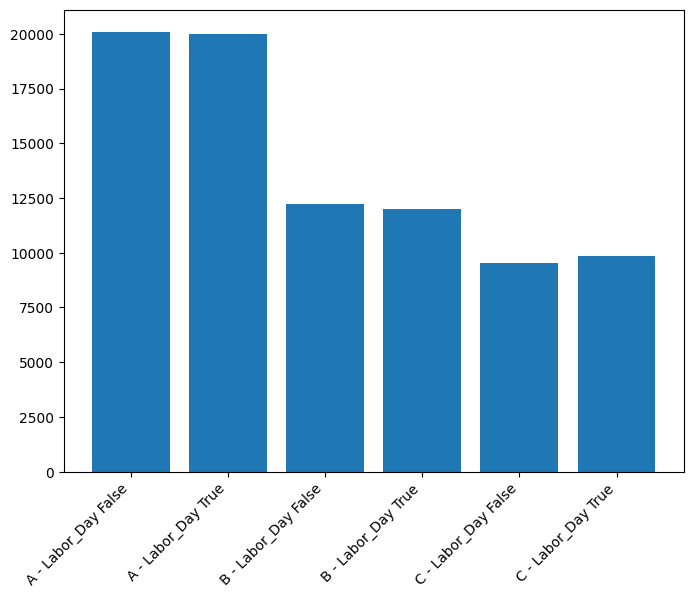

In [172]:
plt.figure(figsize=(8,6))
plt.bar(range(len(df_plot_Labor_Day)), df_plot_Labor_Day['Weekly_Sales'], tick_label=df_plot_Labor_Day['Type'] + ' - Labor_Day ' + df_plot_Labor_Day['Labor_Day'].astype(str))
plt.xlabel = ('Type - Laboar_Day')
plt.ylabel = ('Mean Weekly Sales')
plt.title = ('Mean Weekly Sales by Type and Laboar_Day')
plt.xticks(rotation=45, ha='right')
plt.show()

### Thanksgiving

In [248]:
df_merge.groupby(['Type', 'Thanksgiving'])['Weekly_Sales'].mean()

Type  Thanksgiving
A     False           19995.309014
      True            27370.728296
B     False           12144.563438
      True            18661.296519
C     False            9517.272388
      True             9679.900152
Name: Weekly_Sales, dtype: float64

In [174]:
HT3 = df_merge.groupby(['Type', 'Thanksgiving'])['Weekly_Sales'].mean()

In [184]:
df_plot_Thanksgiving = HT3.reset_index()

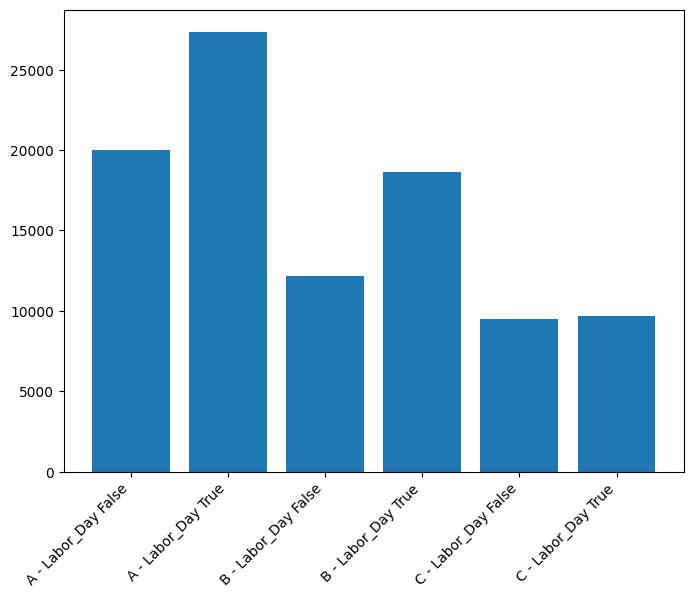

In [186]:
plt.figure(figsize=(8,6))
plt.bar(range(len(df_plot_Thanksgiving)), df_plot_Thanksgiving['Weekly_Sales'], tick_label=df_plot_Thanksgiving['Type'] + ' - Labor_Day ' + df_plot_Thanksgiving['Thanksgiving'].astype(str))
plt.xlabel = ('Type - Thanksgiving')
plt.ylabel = ('Mean Weekly Sales')
plt.title = ('Mean Weekly Sales by Type and Thanksgiving')
plt.xticks(rotation=45, ha='right')
plt.show()

### Christmas

In [187]:
df_merge.groupby(['Type', 'Christmas'])['Weekly_Sales'].mean()

Type  Christmas
A     False        20126.297990
      True         18231.031306
B     False        12249.152357
      True         11394.051524
C     False         9541.691864
      True          7963.228980
Name: Weekly_Sales, dtype: float64

In [191]:
HT4 = df_merge.groupby(['Type', 'Christmas'])['Weekly_Sales'].mean()

In [193]:
df_plot_Christmas = HT4.reset_index()

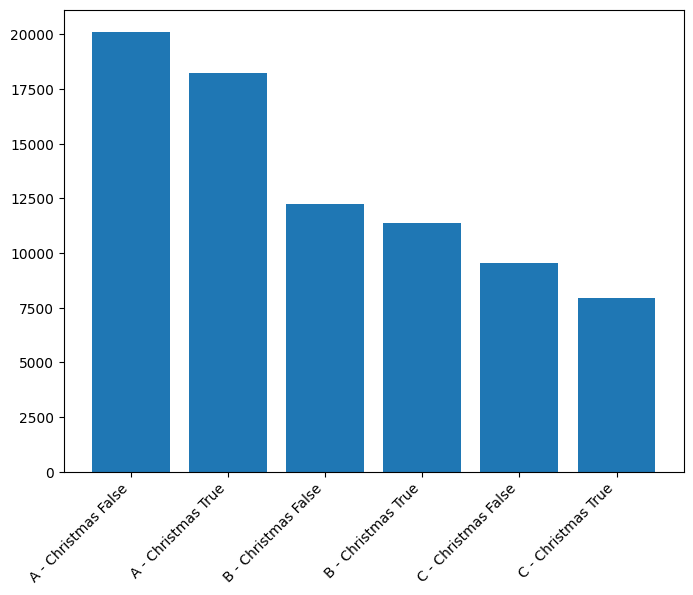

In [195]:
plt.figure(figsize=(8,6))
plt.bar(range(len(df_plot_Christmas)), df_plot_Christmas['Weekly_Sales'], tick_label=df_plot_Christmas['Type'] + ' - Christmas ' + df_plot_Christmas['Christmas'].astype(str))
plt.xlabel = ('Type - Christmas')
plt.ylabel = ('Mean Weekly Sales')
plt.title = ('Mean Weekly Sales by Type and Christmas')
plt.xticks(rotation=45, ha='right')
plt.show()

### Understanding the share of each type of store from the total

In [207]:
# Total row of data
len(df_merge)

421570

In [231]:
df_merge['Type'].unique()

array(['A', 'B', 'C'], dtype=object)

In [218]:
# Number of store with type A
(df_merge['Type'] == 'A').value_counts()

Type
True     215478
False    206092
Name: count, dtype: int64

In [223]:
#Percentage of store with type A
(((df_merge['Type'] == 'A').value_counts()) / (len(df_merge))) * 100

Type
True     51.11322
False    48.88678
Name: count, dtype: float64

In [224]:
# Number of store with type B
(df_merge['Type'] == 'B').value_counts()

Type
False    258075
True     163495
Name: count, dtype: int64

In [225]:
#Percentage of store with type B
(((df_merge['Type'] == 'B').value_counts()) / (len(df_merge))) * 100

Type
False    61.217591
True     38.782409
Name: count, dtype: float64

In [212]:
# Number of store with type C
(df_merge['Type'] == 'C').value_counts()

Type
False    378973
True      42597
Name: count, dtype: int64

In [222]:
#Percentage of store with type C
(((df_merge['Type'] == 'C').value_counts()) / (len(df_merge))) * 100

Type
False    89.895628
True     10.104372
Name: count, dtype: float64

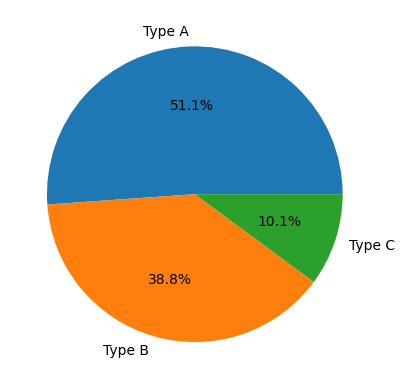

In [230]:
percentage_tpye = [51.11322, 38.782409, 10.104372]
label_type = 'Type A','Type B', 'Type C'
plt.pie(percentage_tpye, labels= label_type, autopct='%1.1f%%')
plt.show()

### understanding the weekly sales based on sotre type and holiday

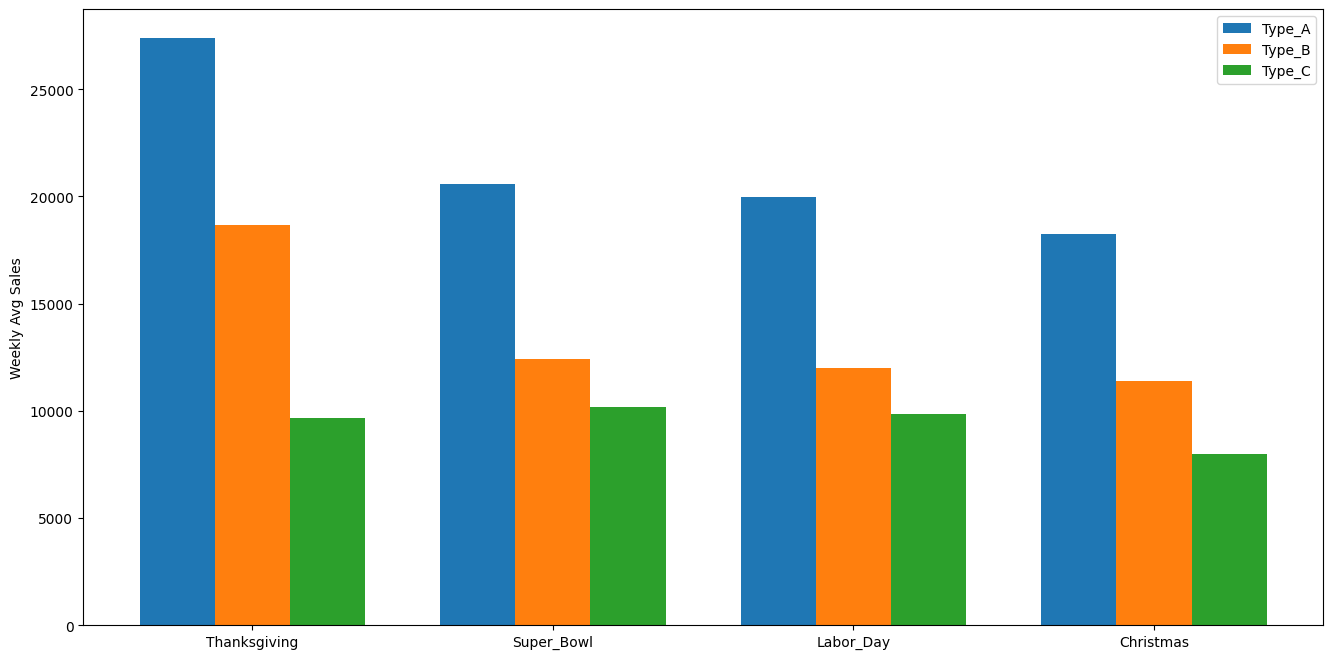

In [269]:
labels = ['Thanksgiving', 'Super_Bowl', 'Labor_Day', 'Christmas']
A_means = [27370.728296, 20603.690832, 19973.219881, 18231.031306]
B_means = [18661.296519, 12401.718198, 12013.482757, 11394.051524]
C_means = [9679.900152, 10156.204711, 9871.225746, 7963.228980]

x = np.arange(len(labels))
width = 0.25
fig, ax = plt.subplots(figsize=(16, 8))
rects1 = plt.bar(x-width, A_means, width, label='Type_A')
rects2 = plt.bar(x, B_means, width, label='Type_B')
rects3 = plt.bar(x+width, C_means, width, label='Type_C')

ax.set_ylabel('Weekly Avg Sales')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.show()

### Top 5 weeks based on sale

In [277]:
df_merge.sort_values(by='Weekly_Sales', ascending=False).head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size,Super_Bowl,Labor_Day,Thanksgiving,Christmas
90645,10,72,2010-11-26,693099.36,True,55.33,3.162,NaN,NaN,NaN,...,NaN,126.669267,9.003,True,B,126512,False,False,True,False
337053,35,72,2011-11-25,649770.18,True,47.88,3.492,1333.24,NaN,58563.24,...,6386.86,140.421786,8.745,True,B,103681,False,False,True,False
94393,10,72,2011-11-25,630999.19,True,60.68,3.760,174.72,329.0,141630.61,...,1009.98,129.836400,7.874,True,B,126512,False,False,True,False
333594,35,72,2010-11-26,627962.93,True,46.67,3.039,NaN,NaN,NaN,...,NaN,136.689571,8.763,True,B,103681,False,False,True,False
131088,14,72,2010-11-26,474330.10,True,46.15,3.039,NaN,NaN,NaN,...,NaN,182.783277,8.724,True,A,200898,False,False,True,False


### We want to understand about relationship between size and type

In [279]:
df_store.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [291]:
df_store.groupby(by='Type').describe()['Size']

,count,mean,std,min,25%,50%,75%,max
Type,,,,,,,,
A,22.0,177247.727273,49392.621098,39690.0,155840.75,202406.0,203819.0,219622.0
B,17.0,101190.705882,32371.137916,34875.0,93188.00,114533.0,123737.0,140167.0
C,6.0,40541.666667,1304.145033,39690.0,39745.00,39910.0,40774.0,42988.0


<Axes: xlabel='Type', ylabel='Size'>

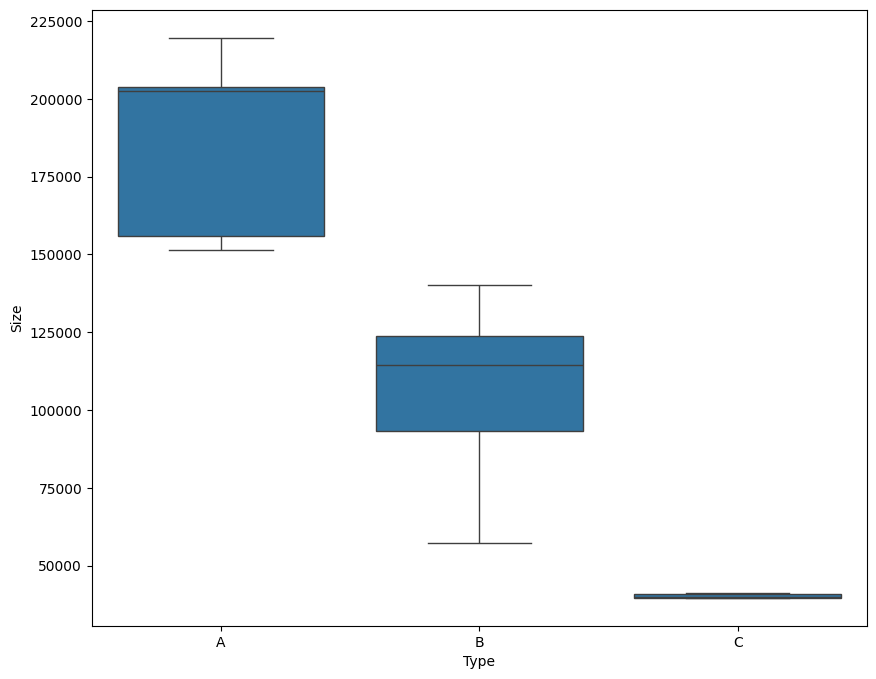

In [295]:
plt.figure(figsize=(10,8))
sns.boxplot(data=df_store, x='Type', y='Size')

### Investigate to find is there any corrolation between MarkDown and Weekly Sales

In [299]:
df_merge['MarkDown1'].fillna(0)

0            0.00
1            0.00
2            0.00
3            0.00
4            0.00
           ...   
421565    4018.91
421566    4018.91
421567    4018.91
421568    4018.91
421569    4018.91
Name: MarkDown1, Length: 421570, dtype: float64

In [301]:
df_merge['MarkDown2'].fillna(0)

0          0.00
1          0.00
2          0.00
3          0.00
4          0.00
          ...  
421565    58.08
421566    58.08
421567    58.08
421568    58.08
421569    58.08
Name: MarkDown2, Length: 421570, dtype: float64

In [303]:
df_merge['MarkDown3'].fillna(0)

0           0.0
1           0.0
2           0.0
3           0.0
4           0.0
          ...  
421565    100.0
421566    100.0
421567    100.0
421568    100.0
421569    100.0
Name: MarkDown3, Length: 421570, dtype: float64

In [305]:
df_merge['MarkDown4'].fillna(0)

0           0.00
1           0.00
2           0.00
3           0.00
4           0.00
           ...  
421565    211.94
421566    211.94
421567    211.94
421568    211.94
421569    211.94
Name: MarkDown4, Length: 421570, dtype: float64

In [307]:
df_merge['MarkDown5'].fillna(0)

0           0.00
1           0.00
2           0.00
3           0.00
4           0.00
           ...  
421565    858.33
421566    858.33
421567    858.33
421568    858.33
421569    858.33
Name: MarkDown5, Length: 421570, dtype: float64

<Axes: xlabel='MarkDown1', ylabel='Weekly_Sales'>

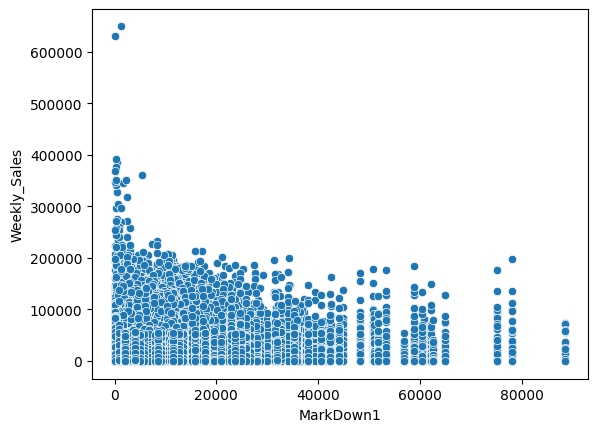

In [322]:
sns.scatterplot(df_merge, x='MarkDown1', y='Weekly_Sales')

In [317]:
df_merge['MarkDown1'].corr(df_merge['Weekly_Sales'])

0.08525115648107046

<Axes: xlabel='MarkDown2', ylabel='Weekly_Sales'>

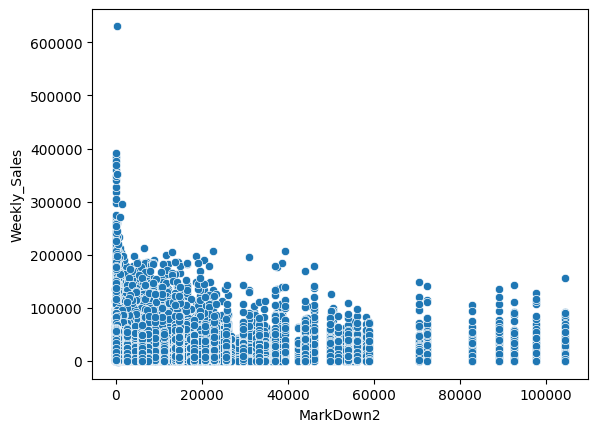

In [323]:
sns.scatterplot(df_merge, x='MarkDown2', y='Weekly_Sales')

In [318]:
df_merge['MarkDown2'].corr(df_merge['Weekly_Sales'])

0.02412961065102784

<Axes: xlabel='MarkDown3', ylabel='Weekly_Sales'>

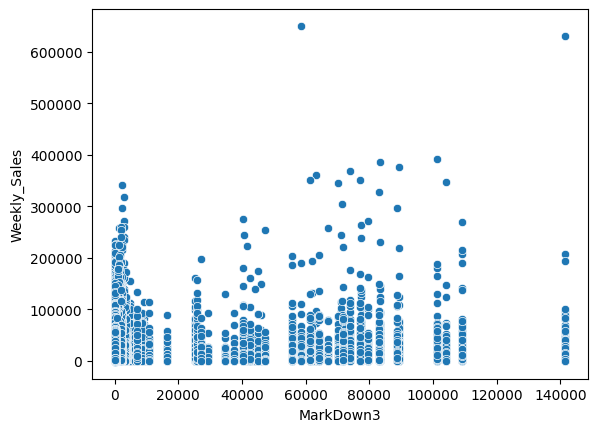

In [324]:
sns.scatterplot(df_merge, x='MarkDown3', y='Weekly_Sales')

In [319]:
df_merge['MarkDown3'].corr(df_merge['Weekly_Sales'])

0.060384760388578596

<Axes: xlabel='MarkDown4', ylabel='Weekly_Sales'>

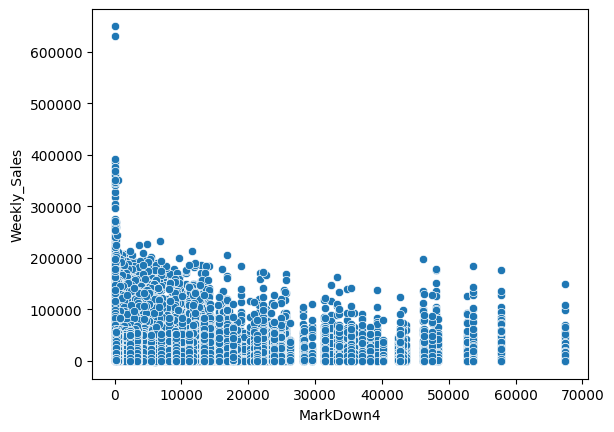

In [325]:
sns.scatterplot(df_merge, x='MarkDown4', y='Weekly_Sales')

In [320]:
df_merge['MarkDown4'].corr(df_merge['Weekly_Sales'])

0.045414402912654556

<Axes: xlabel='MarkDown5', ylabel='Weekly_Sales'>

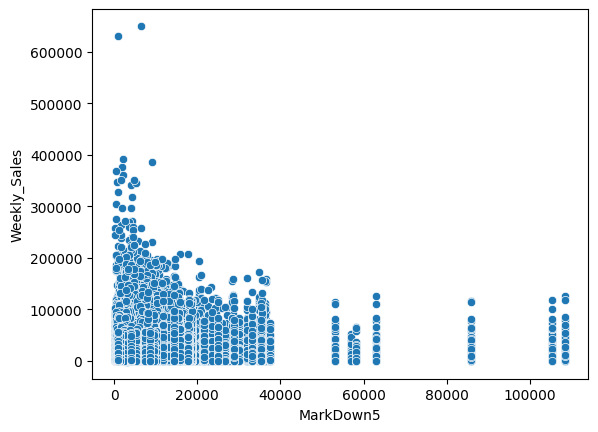

In [329]:
sns.scatterplot(df_merge, x='MarkDown5', y='Weekly_Sales')

In [321]:
df_merge['MarkDown5'].corr(df_merge['Weekly_Sales'])

0.09036206126433409

In [331]:
df_merge.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,136727.915739
std,12.785297,30.492054,22711.183519,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,60980.583328
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,140167.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


### Relationship between department and weekly sales

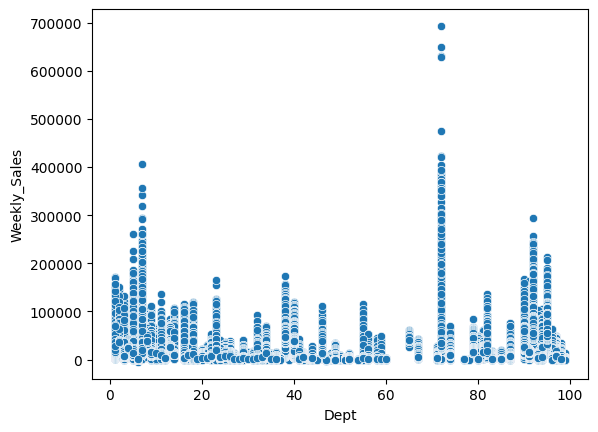

In [351]:
sns.scatterplot(data=df_merge, x='Dept', y='Weekly_Sales')
plt.title='Weekly Sales by Department'
plt.xlabel='Departments'
plt.ylabel='Weekly Sales'

In [360]:
(df_merge.groupby(by='Dept')['Weekly_Sales'].mean()).sort_values(ascending=False)

Dept
92    75204.870531
95    69824.423080
38    61090.619568
72    50566.515417
65    45441.706224
          ...     
51       21.931729
39       11.123750
78        7.296638
43        1.193333
47       -7.682554
Name: Weekly_Sales, Length: 81, dtype: float64